Loading dataset...
Training Data Sample:
   id                             title     genre  \
0   1      Oscar et la dame rose (2009)     drama   
1   2                      Cupid (1997)  thriller   
2   3  Young, Wild and Wonderful (1980)     adult   
3   4             The Secret Sin (1915)     drama   
4   5            The Unrecovered (2007)     drama   

                                         description  
0  Listening in to a conversation between his doc...  
1  A brother and sister with a past incestuous re...  
2  As the bus empties the students for their fiel...  
3  To help their unemployed father make ends meet...  
4  The film's title refers not only to the un-rec...  

Test Data Sample:
                                 id     title  \
1      Oscar et la dame rose (2009)     drama   
2                      Cupid (1997)  thriller   
3  Young, Wild and Wonderful (1980)     adult   
4             The Secret Sin (1915)     drama   
5            The Unrecovered (2007)     drama 

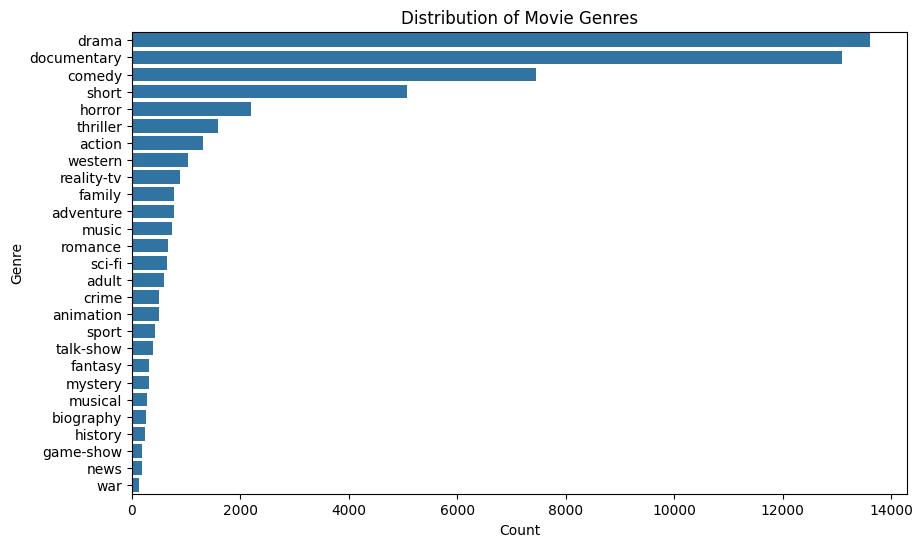


Preprocessing text data...

Training Naive Bayes classifier...

Classification Report:


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

      action       0.59      0.09      0.16       263
       adult       0.86      0.05      0.10       112
   adventure       0.43      0.04      0.08       139
   animation       0.00      0.00      0.00       104
   biography       0.00      0.00      0.00        61
      comedy       0.51      0.44      0.47      1443
       crime       0.00      0.00      0.00       107
 documentary       0.57      0.88      0.70      2659
       drama       0.46      0.83      0.59      2697
      family       1.00      0.01      0.01       150
     fantasy       0.00      0.00      0.00        74
   game-show       1.00      0.15      0.26        40
     history       0.00      0.00      0.00        45
      horror       0.72      0.39      0.50       431
       music       0.88      0.10      0.19       144
     musical       0.00      0.00      0.00        50
     mystery       0.00      0.00      0.00        56
        news       0.00    

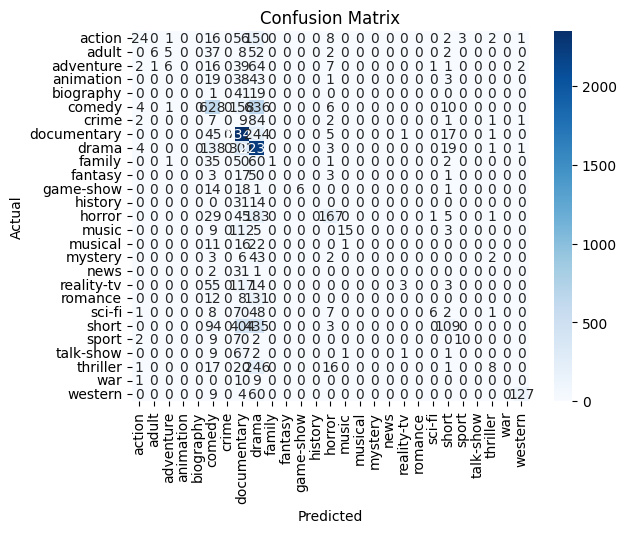


Top 10 Features for Each Genre:

Genre: action
['city', 'action', 'gang', 'game', 'team', 'world', 'life', 'fight', 'man', 'police']

Genre: adult
['woman', 'young', 'hot', 'bondage', 'women', 'sexual', 'bound', 'girls', 'gagged', 'sex']

Genre: adventure
['beautiful', 'jungle', 'tied', 'game', 'story', 'adventure', 'world', 'bound', 'gagged', 'bondage']

Genre: animation
['adventure', 'time', 'christmas', 'new', 'series', 'evil', 'friends', 'world', 'animated', 'adventures']

Genre: biography
['documentary', 'great', 'music', 'world', 'age', 'time', 'new', 'story', 'film', 'life']

Genre: comedy
['young', 'time', 'make', 'family', 'friends', 'man', 'new', 'love', 'life', 'comedy']

Genre: crime
['criminal', 'life', 'drug', 'killer', 'man', 'case', 'detective', 'murder', 'crime', 'police']

Genre: documentary
['journey', 'history', 'new', 'years', 'story', 'people', 'life', 'world', 'documentary', 'film']

Genre: drama
['old', 'son', 'story', 'mother', 'man', 'father', 'family', 'youn

'Save the model and vectorizer (optional)\njoblib.dump(model, \'models/genre_classifier.pkl\')\njoblib.dump(vectorizer, \'models/tfidf_vectorizer.pkl\')\nprint("\nModel and vectorizer saved to \'models/\' directory.")'

In [15]:
# Movie Genre Classification - Exploratory Data Analysis and Model Prototyping

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Load the dataset
print("Loading dataset...")
train_df = pd.read_csv(r'C:\Users\Admin\OneDrive\Desktop\Movie Genre\notebooks\train_data.txt', sep=' ::: ', header=None, engine='python', names=["id", "title", "genre", "description"])
test_df = pd.read_csv(r'C:\Users\Admin\OneDrive\Desktop\Movie Genre\notebooks\train_data.txt', sep=' ::: ', header=None, engine='python', names=["id", "title", "description"])

# Display the first few rows of the training data
print("Training Data Sample:")
print(train_df.head())

# Display the first few rows of the test data
print("\nTest Data Sample:")
print(test_df.head())

# Exploratory Data Analysis (EDA)
print("\nPerforming EDA...")

# Check for missing values
print("\nMissing Values in Training Data:")
print(train_df.isnull().sum())

print("\nMissing Values in Test Data:")
print(test_df.isnull().sum())

# Distribution of genres in the training data
plt.figure(figsize=(10, 6))
sns.countplot(y=train_df['genre'], order=train_df['genre'].value_counts().index)
plt.title("Distribution of Movie Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

# Preprocessing
print("\nPreprocessing text data...")

# Combine title and description for better context
train_df['text'] = train_df['title'] + " " + train_df['description']
test_df['text'] = test_df['title'] + " " + test_df['description']

# Convert text data into numerical vectors using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train = vectorizer.fit_transform(train_df['text'])
X_test = vectorizer.transform(test_df['text'])
y_train = train_df['genre']

# Split the training data for validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train a Naive Bayes classifier (as an example)
print("\nTraining Naive Bayes classifier...")
model = MultinomialNB()
model.fit(X_train_split, y_train_split)

# Evaluate the model on the validation set
y_pred = model.predict(X_val_split)
print("\nClassification Report:")
print(classification_report(y_val_split, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_val_split, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance (for interpretability)
print("\nTop 10 Features for Each Genre:")
for i, genre in enumerate(model.classes_):
    top_features = np.argsort(model.feature_log_prob_[i])[-10:]
    print(f"\nGenre: {genre}")
    print([vectorizer.get_feature_names_out()[index] for index in top_features])

"""Save the model and vectorizer (optional)
joblib.dump(model, 'models/genre_classifier.pkl')
joblib.dump(vectorizer, 'models/tfidf_vectorizer.pkl')
print("\nModel and vectorizer saved to 'models/' directory.")"""